In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import seaborn
import glob
import os
import urllib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style
import datetime as dt
from dateutil import parser
%matplotlib inline

C:\Users\Mark\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
style.use('fivethirtyeight')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [3]:
print(plt.__file__)

C:\Users\Mark\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\pyplot.py


In [4]:
path_1 = r'C:\Users\Mark\Desktop\project_one\Stock Prices'
all_files_aapl = glob.glob(os.path.join(path_1, 'aapl.csv'))

df_from_each_file_aapl = (pd.read_csv(f) for f in all_files_aapl)

concatenated_df_aapl = pd.concat(df_from_each_file_aapl, ignore_index=True)
concatenated_df_aapl.head()

,Company,Date,Open,High,Low,Close,Volume,Adj Close
0,AAPL,29-Dec-17,170.520004,170.589996,169.220001,169.229996,25999900,169.229996
1,AAPL,28-Dec-17,171.000000,171.850006,170.479996,171.080002,16480200,171.080002
2,AAPL,27-Dec-17,170.100006,170.779999,169.710007,170.600006,21498200,170.600006
3,AAPL,26-Dec-17,170.800003,171.470001,169.679993,170.570007,33185500,170.570007
4,AAPL,22-Dec-17,174.679993,175.419998,174.500000,175.009995,16349400,175.009995


In [5]:
concatenated_df_aapl['Date'] = pd.to_datetime(concatenated_df_aapl['Date'])
concatenated_df_aapl = concatenated_df_aapl.sort_values(by='Date')

In [21]:
hur_kat_df_aapl = concatenated_df_aapl[(concatenated_df_aapl['Date'] > '2005-03-01') & (concatenated_df_aapl['Date'] < '2009-07-24')]
hur_kat_df_aapl.head(10)

,Company,Date,Open,High,Low,Close,Volume,Adj Close
3231,AAPL,2005-03-02,6.321429,6.412857,6.297143,6.302857,114540300,5.650093
3230,AAPL,2005-03-03,6.338572,6.344285,5.888571,5.970000,352913400,5.351707
3229,AAPL,2005-03-04,6.108572,6.144286,5.978571,6.115714,189154700,5.482331
3228,AAPL,2005-03-07,6.114286,6.178571,6.050000,6.107143,112658000,5.474646
3227,AAPL,2005-03-08,5.985714,6.022857,5.728571,5.790000,255362800,5.190350
3226,AAPL,2005-03-09,5.662857,5.754286,5.547143,5.621428,330616300,5.039236
3225,AAPL,2005-03-10,5.647143,5.751429,5.585714,5.690000,194277300,5.100706
3224,AAPL,2005-03-11,5.744286,5.798572,5.685714,5.752857,158207700,5.157053
3223,AAPL,2005-03-14,5.788571,5.827143,5.645714,5.760000,151346300,5.163457
3222,AAPL,2005-03-15,5.805714,5.877143,5.750000,5.851429,127152200,5.245416


In [22]:
MA1 = 10
MA2 = 30
MA3 = 200

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

In [23]:
def high_minus_low(highs, lows):
    return highs-lows

In [24]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

In [25]:
def graph_data(stock):

    fig = plt.figure(facecolor='#f0f0f0')
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
    plt.ylabel('Price')
    ax2v = ax2.twinx()
    
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    plt.ylabel('MAvgs')

In [26]:
date = hur_kat_df_aapl['Date'].tolist()
closep = hur_kat_df_aapl['Close'].tolist()
highp = hur_kat_df_aapl['High'].tolist()
lowp = hur_kat_df_aapl['Low'].tolist()
openp = hur_kat_df_aapl['Open'].tolist()
volume = hur_kat_df_aapl['Volume'].tolist()

In [27]:
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    #months = np.arange(0,13,1)    
    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    price = closep
    start = len(date[MA2-1:])
    
    h_l = list(map(high_minus_low, highp, lowp))
        

In [28]:
#ma1 = np.insert(ma1, 0, [0,0,0,0,0,0,0,0,0], axis=0)
short_date = date[9:]
short_date_2 = date[29:]
short_date_3 = date[199:]

Text(0,0.5,'(Red) = 10-day, (Green) = 30-day, (Blue) = Price)')

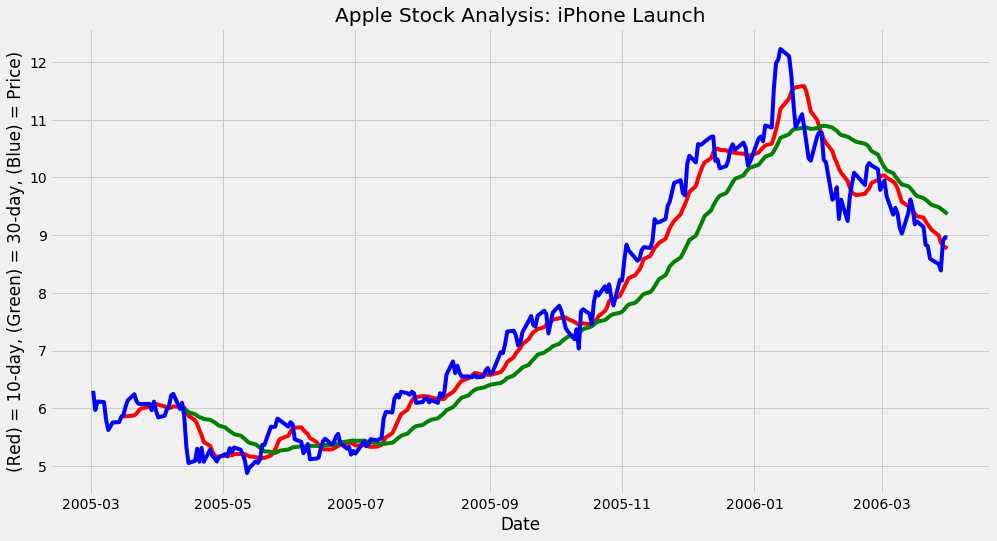

In [29]:
plt.figure(figsize=(15,8))

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")
Price, = plt.plot(date, price, color="blue", label="Price")

plt.title("Apple Stock Analysis: iPhone Launch")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")


In [30]:
path_2 = r'C:\Users\Mark\Desktop\project_one\Stock Prices'
all_files_xom = glob.glob(os.path.join(path_2, 'XOM.csv'))

df_from_each_file_xom = (pd.read_csv(f) for f in all_files_xom)

concatenated_df_xom = pd.concat(df_from_each_file_xom, ignore_index=True)
concatenated_df_xom.head()

,Company,Date,Open,High,Low,Close,Volume,Adj Close
0,XOM,29-Dec-17,84.000000,84.199997,83.639999,83.639999,8523400,83.639999
1,XOM,28-Dec-17,83.980003,84.050003,83.800003,84.019997,7495300,84.019997
2,XOM,27-Dec-17,83.989998,84.099998,83.739998,83.900002,7000600,83.900002
3,XOM,26-Dec-17,83.959999,84.360001,83.900002,83.980003,4777200,83.980003
4,XOM,22-Dec-17,83.879997,84.019997,83.599998,83.970001,10161400,83.970001


In [31]:
concatenated_df_xom['Date'] = pd.to_datetime(concatenated_df_xom['Date'])
concatenated_df_xom = concatenated_df_xom.sort_values(by='Date')

In [32]:
hur_kat_df_xom = concatenated_df_xom[(concatenated_df_xom['Date'] > '2005-03-01') & (concatenated_df_xom['Date'] < '2006-4-01')]
hur_kat_df_xom.head(10)

,Company,Date,Open,High,Low,Close,Volume,Adj Close
3231,XOM,2005-03-02,62.049999,63.169998,62.029999,62.680000,25974500,45.104118
3230,XOM,2005-03-03,62.700001,63.130001,62.299999,63.049999,20290900,45.370377
3229,XOM,2005-03-04,63.119999,64.010002,62.750000,63.570000,20804500,45.744560
3228,XOM,2005-03-07,63.580002,63.599998,62.580002,63.000000,19294800,45.334396
3227,XOM,2005-03-08,63.150002,63.599998,62.799999,63.099998,18192000,45.406338
3226,XOM,2005-03-09,63.099998,64.370003,60.700001,60.790001,68153700,43.744087
3225,XOM,2005-03-10,60.900002,61.040001,59.500000,60.369999,40001800,43.441864
3224,XOM,2005-03-11,60.369999,61.590000,60.169998,61.049999,24561500,43.931179
3223,XOM,2005-03-14,61.060001,61.500000,60.040001,61.279999,19564300,44.096687
3222,XOM,2005-03-15,61.290001,61.860001,60.270000,60.349998,17576600,43.427467


In [33]:
date = hur_kat_df_xom['Date'].tolist()
closep = hur_kat_df_xom['Close'].tolist()
highp = hur_kat_df_xom['High'].tolist()
lowp = hur_kat_df_xom['Low'].tolist()
openp = hur_kat_df_xom['Open'].tolist()
volume = hur_kat_df_xom['Volume'].tolist()

Text(0,0.5,'(Red) = 10-day, (Green) = 30-day, (Blue) = Price)')

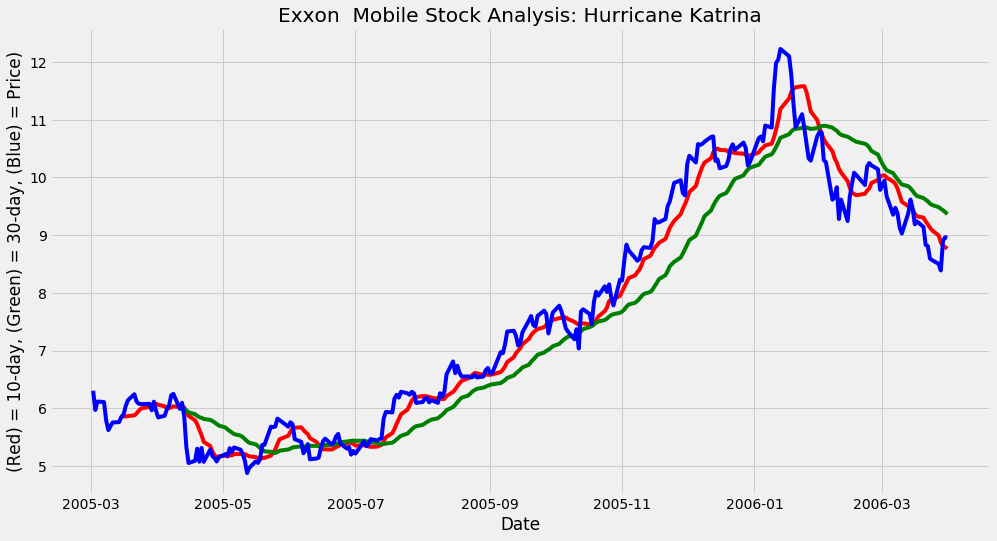

In [34]:
plt.figure(figsize=(15,8))

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")
Price, = plt.plot(date, price, color="blue", label="Price")

plt.title("Exxon  Mobile Stock Analysis: Hurricane Katrina")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")

In [35]:
closep_aapl = hur_kat_df_aapl['Close'].tolist()
closep_xom = hur_kat_df_xom['Close'].tolist()
ma3_aapl = moving_average(closep_aapl,MA3)
ma3_xom = moving_average(closep_xom,MA3)

Text(0,0.5,'(Red) = Apple, (Green) = Exxon Mobile')

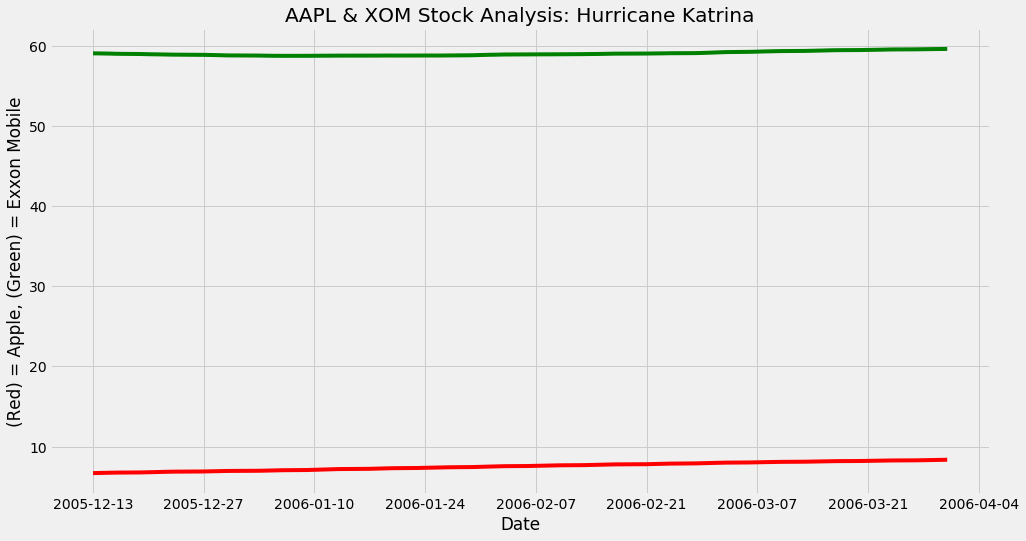

In [36]:
plt.figure(figsize=(15,8))

AAPL_MA50, = plt.plot(short_date_3, ma3_aapl, color="red", label="AAPL")
XOM_MA50, = plt.plot(short_date_3, ma3_xom, color="green", label="XOM")

plt.title("AAPL & XOM Stock Analysis: Hurricane Katrina")
plt.xlabel("Date")
plt.ylabel("(Red) = Apple, (Green) = Exxon Mobile")